In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Case Study: 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

List of Location with Number of Fundings is given as: 
Bangalore - 637
Mumbai - 449
New Delhi - 389
Gurgaon - 241
Noida - 79
Maximum Funding is done in Bangalore , 637 times.


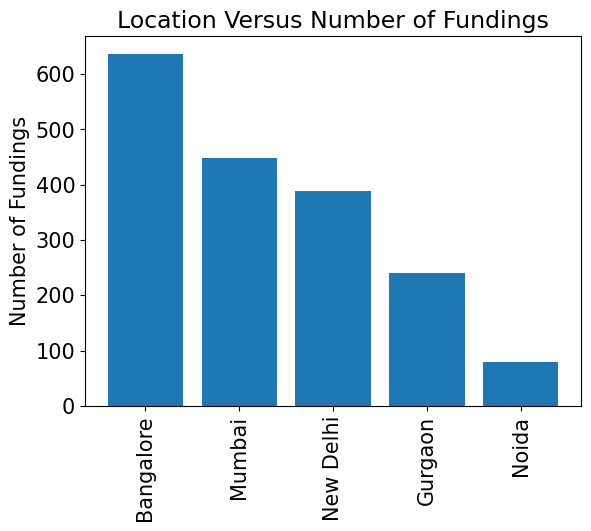

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['CityLocation'].dropna(inplace=True)

def city_count(city):
    try:
        l = city.split('/')
        for c in l:
            c=c.strip()
            if c in locations:
                d[c]=d.get(c,0)+1
        return
    except:
        return

df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

locations=['Bangalore','Mumbai','Gurgaon','Noida','New Delhi']
d={}
df['CityLocation'].apply(city_count)

location = np.array(list(d.keys()))
number_of_fundings = np.array(list(d.values()))

print("List of Location with Number of Fundings is given as: ")
for i in range(len(location)):
    print(location[i],"-",number_of_fundings[i])

ind=number_of_fundings.argmax()
print("Maximum Funding is done in",location[ind],",",number_of_fundings[ind],"times.")

plt.bar(location,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Location Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

## Case Study: 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Top 5 Investors are:
Sequoia Capital - 64
Accel Partners - 53
Kalaari Capital - 44
SAIF Partners - 41
Indian Angel Network - 40


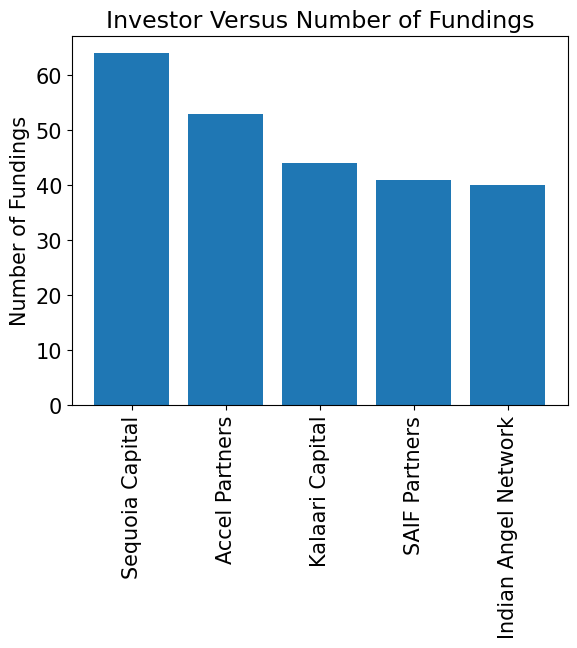

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['InvestorsName'].dropna(inplace=True)
d= {}

def investor_count(investor):
    try:
        l = investor.split(',')
        for i in l:
            i = i.strip()
            d[i]=d.get(i,0)+1
    except:
        pass
        
df['InvestorsName'].apply(investor_count)

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

## Case Study: 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Top 5 Investors are:
Sequoia Capital - 48
Accel Partners - 47
Kalaari Capital - 41
Indian Angel Network - 40
Blume Ventures - 36


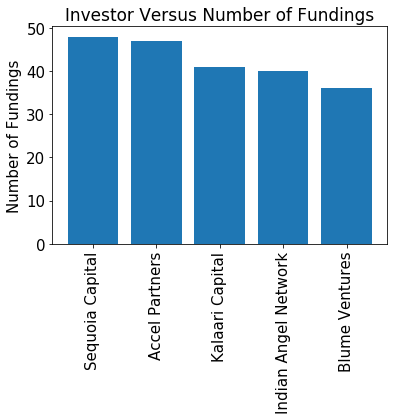

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if invest != "":
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()


## Case Study: 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network - 33
Rajan Anandan - 23
LetsVenture - 16
Anupam Mittal - 16
Group of Angel Investors - 14


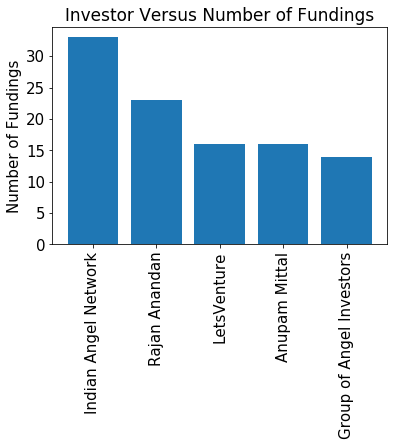

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()


## Case Study: 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24


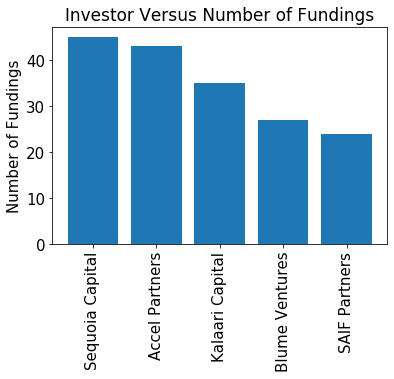

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()
